<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


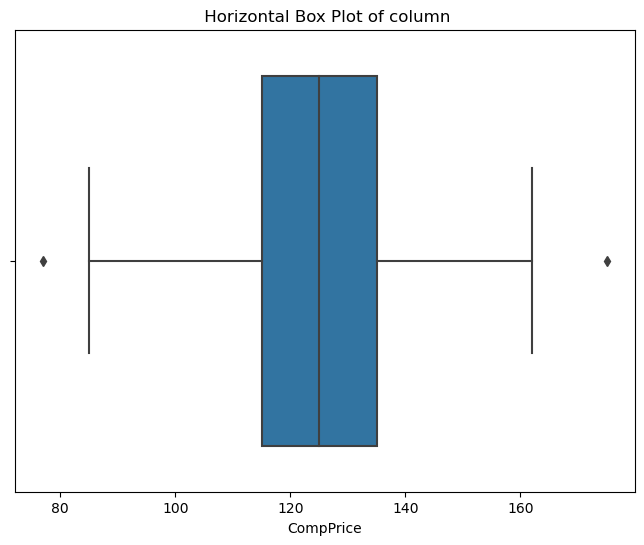

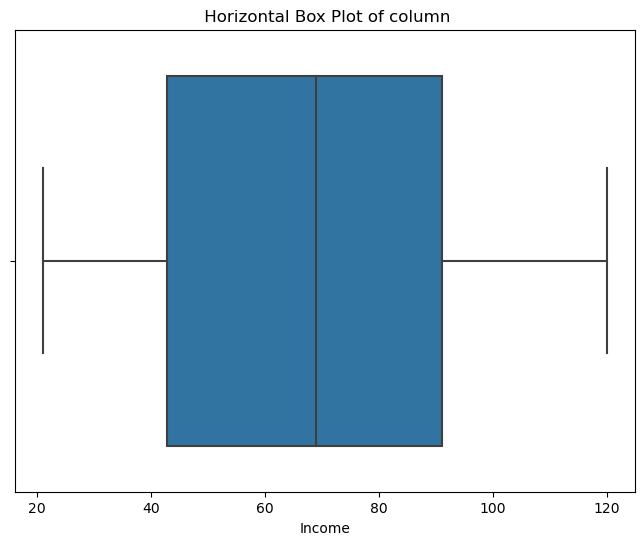

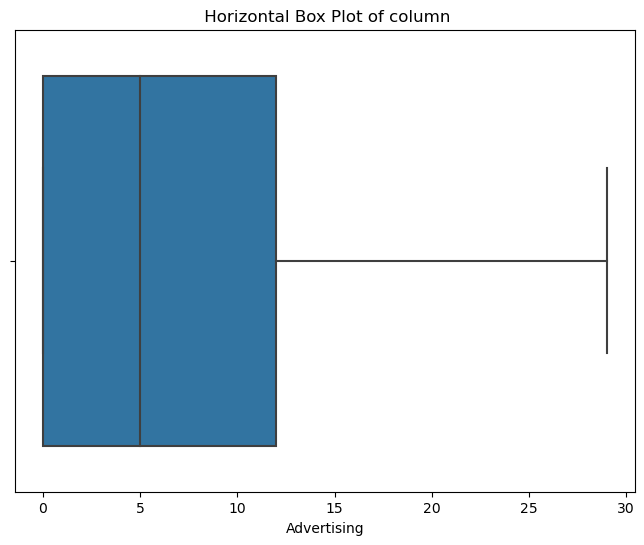

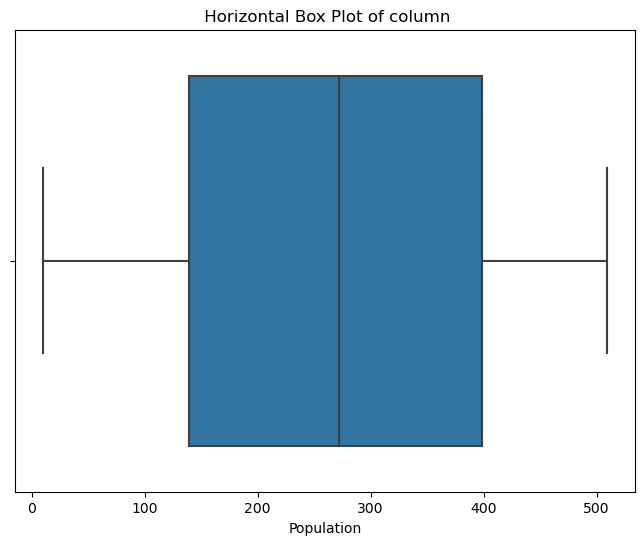

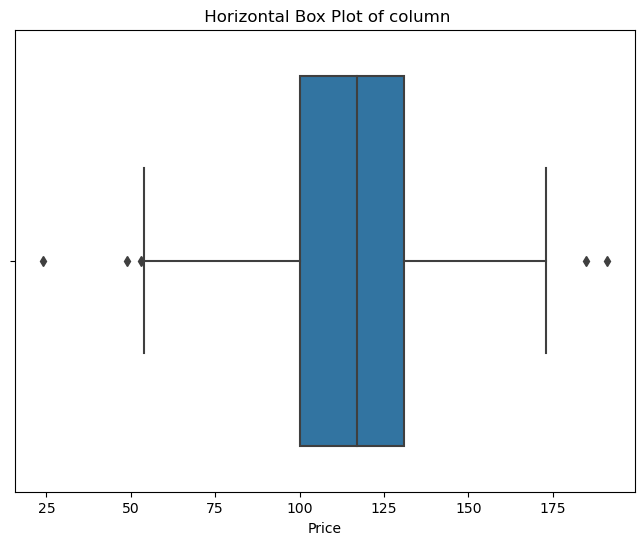

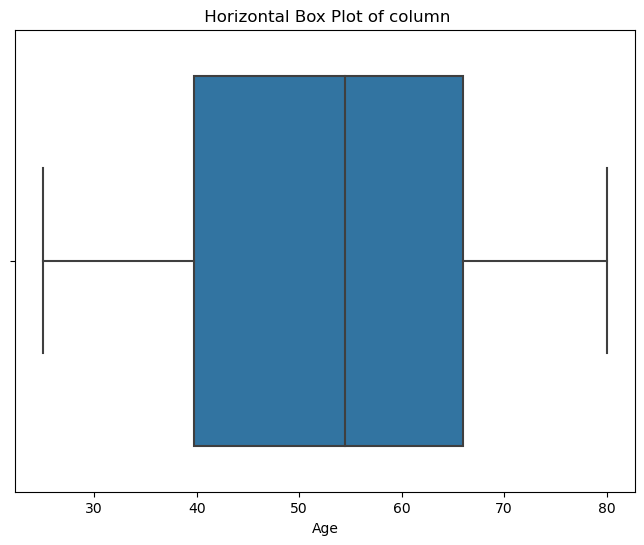

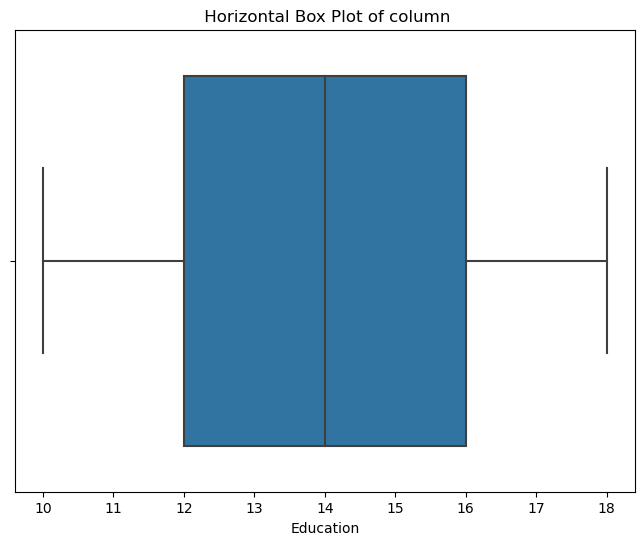

          Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  \
0    High Sales        138      73           11         276    120       Bad   
1    High Sales        111      48           16         260     83      Good   
2    High Sales        113      35           10         269     80    Medium   
3     Low Sales        117     100            4         466     97    Medium   
4     Low Sales        141      64            3         340    128       Bad   
..          ...        ...     ...          ...         ...    ...       ...   
395  High Sales        138     108           17         203    128      Good   
396   Low Sales        139      23            3          37    120    Medium   
397   Low Sales        162      26           12         368    159    Medium   
398   Low Sales        100      79            7         284     95       Bad   
399  High Sales        134      37            0          27    120      Good   

     Age  Education Urban   US  
0     

C:\Users\bhanu\AppData\Local\Temp\ipykernel_19660\846745119.py:59: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()
C:\Users\bhanu\AppData\Local\Temp\ipykernel_19660\846745119.py:60: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


Training Accuracy Score: 1.0
Testing Accuracy Score: 0.818
Number of nodes : 63
level of depth : 9
Training Accuracy Score: 0.986
Testing Accuracy Score: 0.838


E:\ANACONDA\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy Score: 1.0
Testing Accuracy Score: 0.788


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 24 16:10:02 2023

@author: bhanu's

"""

#import
import pandas as pd
df = pd.read_csv("C:\\Users\\bhanu\\OneDrive\\Desktop\\data science assesments\\Company_Data.csv")
df.shape 
#(400, 11)
df.info()

# Convert 'Sales' into a categorical variable (e.g., High Sales and Low Sales)
threshold = df['Sales'].quantile(0.75) 
df['Sales'] = df['Sales'].apply(lambda x: 'High Sales' if x >= threshold else 'Low Sales')

#EDA
#-->BOXPLOT
import seaborn as sns
import matplotlib.pyplot as plt
data = ['CompPrice','Income','Advertising','Population','Price','Age','Education']
for column in data:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[column])
    plt.title(" Horizontal Box Plot of column")
    plt.show()
#--> we have seen the ouliers at once without doing everytime for each variable using seaborn

#removing the ouliers
import seaborn as sns
import matplotlib.pyplot as plt
#-->List of column names with continuous variables
continuous_columns = ['CompPrice','Income','Advertising','Population','Price','Age','Education']

# Create a new DataFrame without outliers
data_without_outliers = df.copy()
for column in continuous_columns:
    Q1 = data_without_outliers[column].quantile(0.25)
    Q3 = data_without_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[column] >= lower_whisker) & (data_without_outliers[column] <= upper_whisker)]

# Print the cleaned data without outliers
print(data_without_outliers)
df = data_without_outliers
df
# Check the shape and info of the cleaned DataFrame
print(df.shape)  
#-->(390, 11)
print(df.info())

#HISTOGRAM BUILDING, SKEWNESS AND KURTOSIS CALCULATION 
df.hist()
df.skew()
df.kurt()
df.describe()

#LabelEncoding for categorical Variables
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["ShelveLoc"] = LE.fit_transform(df["ShelveLoc"])
df["Urban"] = LE.fit_transform(df["Urban"])
df["US"] = LE.fit_transform(df["US"])

# spliting X,Y
X = df.drop("Sales", axis=1)
X
Y1 = df["Sales"]
Y1

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = LE.fit_transform(Y1)
Y

#Data Partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75,random_state=123)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_train
Y_pred_test = DT.predict(X_test)
Y_pred_test

#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))  
#Training Accuracy Score: 1.0

ac2 = accuracy_score(Y_test,Y_pred_test)
print("Testing Accuracy Score:",ac2.round(3)) 
#Testing Accuracy Score: 0.765

#-->visuvalisation of the tree (can be executed in google colab)
'''
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(DT,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph
'''
print("Number of nodes :",DT.tree_.node_count)
print("level of depth :",DT.tree_.max_depth)
#-->Number of nodes : 67
#-->level of depth : 9

# Ensemble methods
#-->Random forest (parallel)
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=7,
                        n_estimators=100,
                        max_samples=0.6,
                        max_features=0.7,
                        random_state=123)    
RF.fit(X_train,Y_train)
Y_pred_train = RF.predict(X_train)
Y_pred_test = RF.predict(X_test)

#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))  
#Training Accuracy Score: 0.973
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Testing Accuracy Score:",ac2.round(3))  
#Testing Accuracy Score: 0.796

#-->ADA boost (sequentionl)
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=100,
                         learning_rate=0.1)
ABC.fit(X_train,Y_train)
Y_pred_train = ABC.predict(X_train)
Y_pred_test = ABC.predict(X_test)

#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))  
#Training Accuracy Score: 1.0
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Testing Accuracy Score:",ac2.round(3))  
#Testing Accuracy Score: 0.714

# "Grid search CV"
import numpy as np
from  sklearn.model_selection import GridSearchCV
parameter_test = {'n_estimators':range(100,300,100),'learning_rate':np.arange(0.001,0.1,0.001)}

search_bestparameter = GridSearchCV(estimator = AdaBoostClassifier(),param_grid = parameter_test,scoring='accuracy',cv=5)
#cv means cross validiting complete process here it is validating 5 times because we gave 5

search_bestparameter.fit(X,Y) #we need to give the complete data here

import numpy as np
np.sqrt(abs(search_bestparameter.best_score_))
search_bestparameter.best_params_